In [106]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

In [119]:
df = pd.read_csv("G:/Python_projects/Machine-Learning/MaktabKhoone/housePrice.csv")

# take a look at the dataset
df.head(10)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1850000000,61666.67
1,60,1,True,True,True,Shahran,1850000000,61666.67
2,79,2,True,True,True,Pardis,550000000,18333.33
3,95,2,True,True,True,Shahrake Qods,902500000,30083.33
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333.33
5,70,2,True,True,False,North Program Organization,2050000000,68333.33
6,87,2,True,True,True,Pardis,600000000,20000.00
7,59,1,True,True,True,Shahran,2150000000,71666.67
8,54,2,True,True,False,Andisheh,493000000,16433.33
9,71,1,True,True,True,West Ferdows Boulevard,2370000000,79000.00


In [131]:
cdf = df[['Area','Room','Parking','Address','Price','Price(USD)']]
cdf.head(9)

,Area,Room,Parking,Address,Price,Price(USD)
0,63,1,True,Shahran,1850000000,61666.67
1,60,1,True,Shahran,1850000000,61666.67
2,79,2,True,Pardis,550000000,18333.33
3,95,2,True,Shahrake Qods,902500000,30083.33
4,123,2,True,Shahrake Gharb,7000000000,233333.33
5,70,2,True,North Program Organization,2050000000,68333.33
6,87,2,True,Pardis,600000000,20000.00
7,59,1,True,Shahran,2150000000,71666.67
8,54,2,True,Andisheh,493000000,16433.33


In [132]:
cdf = cdf.sort_values(by="Address")
cdf = cdf.dropna(axis=0, how="any")

# Normalizing the data

In [133]:
cdf['Area'] = cdf['Area'].replace([' ',','],'',regex=True)
cdf['Area'] = cdf['Area'].astype(float)
MeanWithNoise = 1000
Noise_ = cdf[cdf['Area'] >= MeanWithNoise]
Noise = Noise_.copy()
NotNoise = cdf[(cdf['Area'] < MeanWithNoise)]
MeanWithOutNoise = int(NotNoise['Area'].mean())
Noise.loc[:,'Area'] = MeanWithOutNoise
cdf[cdf['Area'] > MeanWithNoise] = Noise
#sns.boxplot(x = cdf["Area"])
#plt.show

# Handling categorical data = Address

In [134]:
from sklearn.preprocessing import LabelEncoder
Address_ = cdf['Address']
Address = Address_.copy()
le = LabelEncoder()
le.fit(Address)
Address = le.transform(Address)
cdf['Address'] = Address
# converting area type from float to int
cdf['Area'] = cdf['Area'].astype(int)

# Handling categorical data = Parking

In [140]:
cdf['Parking'] = le.fit_transform(cdf['Parking'])

# Output dataset

In [142]:
cdf.to_csv('G:/Python_projects/Machine-Learning/MaktabKhoone/houseprice', sep='\t')

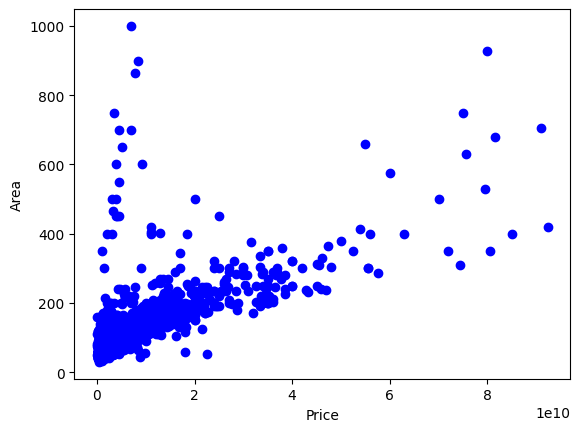

In [147]:
plt.scatter(cdf.Price, cdf.Area,  color='blue')
plt.xlabel("Price")
plt.ylabel("Area")
plt.show()

# Train and test split

In [163]:
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]

# Regression Model

In [167]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Area','Room','Parking','Address']])
y = np.asanyarray(train[['Price']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[7.12301405e+07 1.66482080e+09 6.49107860e+08 3.61903865e+06]]
Intercept:  [-6.619378e+09]


# Predicting for Price

In [169]:
y_hat= regr.predict(test[['Area','Room','Parking','Address']])
x = np.asanyarray(test[['Area','Room','Parking','Address']])
y = np.asanyarray(test[['Price']])
print("Residual sum of squares: %.2f" % np.mean((y_hat - y) ** 2))

print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 35116703747938779136.00
Variance score: 0.51


C:\Users\Reza_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
